
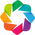

In [1]:
import numpy as np
import pandas as pd
import holoviews as hv
from bokeh.io import output_notebook, show
hv.extension('bokeh','matplotlib')

In [2]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/crime.csv')
df.head()

,State,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny Theft,Motor Vehicle Theft
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8


In [19]:
high_rates = {}
for crime, idx in zip(df.columns[1:], np.argmax(df.iloc[:, 1:].values, 0)):
    high_rates.update({crime:df.State[idx]})
high_rates

{'Aggravated Assault': 'District of Columbia',
 'Burglary': 'North Carolina',
 'Larceny Theft': 'Hawaii',
 'Motor Vehicle Theft': 'District of Columbia',
 'Murder': 'District of Columbia',
 'Rape': 'Alaska',
 'Robbery': 'District of Columbia'}

In [20]:
# lowest rates of crimes:
low_rates = {}
for crime, idx in zip(df.columns[1:], np.argmin(df.iloc[:, 1:].values, 0)):
    low_rates.update({crime:df.State[idx]})
low_rates

{'Aggravated Assault': 'Maine',
 'Burglary': 'North Dakota',
 'Larceny Theft': 'South Dakota',
 'Motor Vehicle Theft': 'Maine',
 'Murder': 'North Dakota',
 'Rape': 'New Jersey',
 'Robbery': 'North Dakota'}

In [21]:
# accross the states, are any crime rates highly correlated
df.set_index('State').corr()

,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny Theft,Motor Vehicle Theft
Murder,1.000000,0.019347,0.925005,0.673629,0.276312,0.223320,0.674955
Rape,0.019347,1.000000,-0.056155,0.379253,0.356518,0.318834,0.139953
Robbery,0.925005,-0.056155,1.000000,0.653702,0.229434,0.181704,0.712368
Aggravated Assault,0.673629,0.379253,0.653702,1.000000,0.547263,0.438468,0.526181
Burglary,0.276312,0.356518,0.229434,0.547263,1.000000,0.679892,0.411503
Larceny Theft,0.223320,0.318834,0.181704,0.438468,0.679892,1.000000,0.473116
Motor Vehicle Theft,0.674955,0.139953,0.712368,0.526181,0.411503,0.473116,1.000000


Looks like robbery and murder might be correlated as well as possibly motor vehicle theft and robbery.

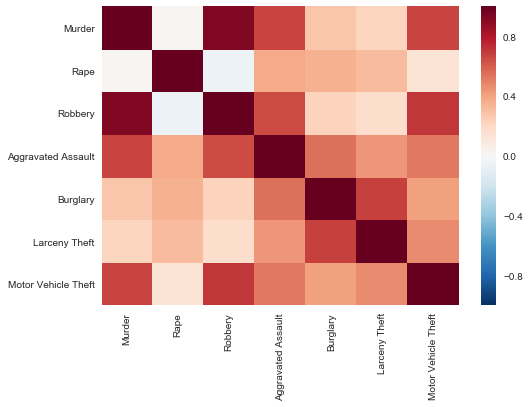

In [22]:
sns.heatmap(df.set_index('State').corr())
plt.show()

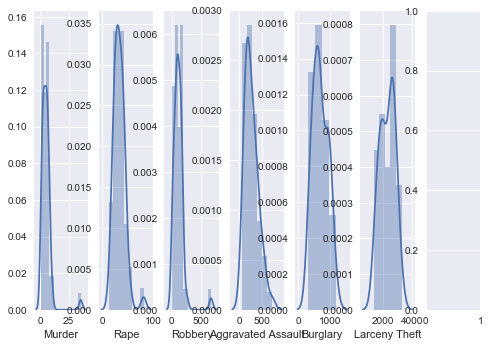

In [23]:
# create histograms by crime
fig, axs = plt.subplots(ncols=7)
for num, col in enumerate(df.columns[1:-1]):
    sns.distplot(df[col], ax= axs[num])
plt.show()

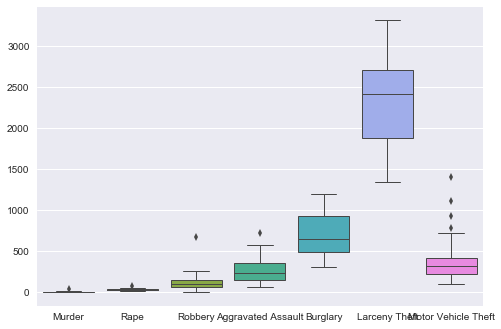

In [24]:
sns.boxplot(data=df.iloc[:, 1:], linewidth=1.0)
plt.show()

The box plot provides us with the quartiles of each distribution. It also provides information about outliers

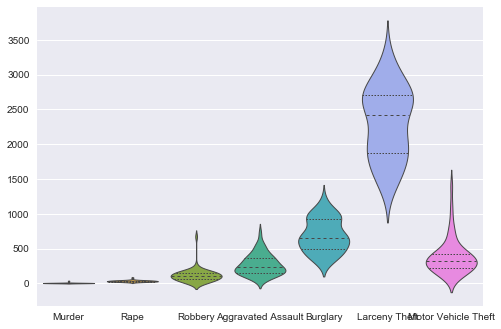

In [25]:
# plot with violin plots:

sns.violinplot(data=df.iloc[:, 1:], scale='count', inner='quartile', linewidth=1.0)
plt.show()

The violin plot allows us to better see the shape of the distribution.

In [36]:
df = pd.read_csv('data/crime.csv')
df['total'] = df.iloc[:, 1:].sum(axis=1)

dfs = []
for col in df.columns[1:-1]:
    s = pd.DataFrame(df[col].values, columns=['rate'])
    s['crime'] = col
    s['state'] = df['State']
    dfs.append(s)
crime_df = pd.concat(dfs, ignore_index=True)


key_dimensions   = [('State', 'State')]
value_dimensions = [('total', 'Rate')]
crime = hv.Table(df, kdims=key_dimensions, vdims=value_dimensions).sort('Rate')

key_dimensions   = [('state', 'State'), ('crime', 'Crime')]
value_dimensions = [('rate', 'Rate')]
crime_stacked = hv.Table(crime_df, kdims=key_dimensions, vdims=value_dimensions)

crime_df_normed = crime_df.copy()
crime_df_normed['rate'] = crime_df_normed.groupby('state').transform(lambda x: x / x.sum())
crime_stacked_normed = hv.Table(crime_df_normed, kdims=key_dimensions, vdims=value_dimensions)

In [37]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [47]:
%%opts Bars [xrotation=90 legend_cols=1 show_legend=False  show_frame=False tools=['hover'] width=750 height=500]
crime.to.bars('State', 'Rate', [])

:Bars   [State]   (total)

In [57]:
%%opts Bars [stack_index=1 xrotation=90 legend_cols=7 show_legend=False  show_frame=False tools=['hover'] width=750 height=500]
%%opts Bars (color=Cycle('Category20'))
crime_stacked.to.bars(['State', 'Crime'], 'Rate', [])
# http://holoviews.org/gallery/demos/bokeh/bars_economic.html

:Bars   [state,crime]   (rate)

In [58]:
%%opts Bars [stack_index=1 xrotation=90 legend_cols=7 show_legend=False  show_frame=False tools=['hover'] width=750 height=500]
%%opts Bars (color=Cycle('Category20'))
crime_stacked_normed.to.bars(['State', 'Crime'], 'Rate', [])

:Bars   [state,crime]   (rate)

In [82]:
from bokeh.sampledata import us_states
from bokeh.plotting import *

us_states = us_states.data.copy()

del us_states["HI"]
del us_states["AK"]

state_xs = [us_states[code]["lons"] for code in us_states]
state_ys = [us_states[code]["lats"] for code in us_states]

state_names = [state['name'] for state in us_states.values()]
state_rates = df.set_index('State')['Larceny Theft'].tolist()

state_polys = {name: hv.Polygons((xs, ys), level=rate, vdims=['Larceny Theft'])
                for name, xs, ys, rate in zip(state_names, state_xs, state_ys, state_rates)}

choropleth = hv.NdOverlay(state_polys, kdims=['State'])

In [97]:
plot_opts = dict(logz=True, tools=['hover'], xaxis=None, yaxis=None, show_grid=False, show_frame=False, width=1100, height=700)
style = dict(line_color='black')

choropleth({'Polygons': {'style': style, 'plot': plot_opts}})

:NdOverlay   [State]
   :Polygons   [x,y]   (Larceny Theft)

In [117]:
df[['State', 'Larceny Theft']].to_csv('static/statesdata.csv', index=False)

In [104]:
import pandas as pd
#oh cool! up here we process the data, but down below we visualize it! all in the same file! wow!

#data described/found here
#https://data.baltimorecity.gov/browse?category=Transportation&limitTo=datasets&utf8=%E2%9C%93
headways = pd.read_csv(open("Charm_City_Circulator_Headways.csv"))
ridership = pd.read_csv(open("Charm_City_Circulator_Ridership.csv"))

def timeToFloat(timeString):
  try:
    minutes, seconds = timeString.split(":")
  except:
    return None
  return float(minutes) + float(seconds)/60.

headways_averages = headways[['day', 'date', 'orangeHeadway', 'purpleHeadway', 'greenHeadway']]
ridership_averages = ridership[['day', 'date', 'orangeAverage', 'purpleAverage', 'greenAverage']]
headways_vs_ridership = headways_averages.merge(ridership_averages)
headways_vs_ridership.purpleHeadway = headways_vs_ridership.purpleHeadway.apply(timeToFloat)

In [105]:
from IPython.display import Javascript
Javascript("""
           window.headwayVsRidership={};
           """.format(headways_vs_ridership.to_json()))

<IPython.core.display.Javascript object>

In [106]:
%%javascript

/*
 * As it turns out, pandas returns a dictionary with 
 * the top-level keys as the column headers, and values
 * as the list of values under that column.
 * I'd recommend looking yourself.
 * This function, in JS, converts to what D3 wants.
 * Of course we could also easily do this on the python side.
 */
function convertPlotData(data){
  var convertedData = [];
  //pandas gives each column the same number of
  //objects, arbitrarily choose one to iterate over
  for(var i in data[Object.keys(data)[0]]){
    var convertedDatum = {};
    for(var key in data){
      convertedDatum[key] = data[key][i];
    }
    convertedData.push(convertedDatum);
  }
  return convertedData;
}

window.convertPlotData = convertPlotData;

<IPython.core.display.Javascript object>

In [107]:
%%javascript
require.config({
    paths: {
        d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min'
    }
});

<IPython.core.display.Javascript object>

In [108]:
%%javascript
require(['d3'], function(d3){
  //a weird idempotency thing
  $("#chart1").remove();
  //create canvas
  element.append("<div id='chart1'></div>");
  $("#chart1").width("960px");
  $("#chart1").height("600px");        
  var margin = {top: 20, right: 20, bottom: 30, left: 40};
  var width = 880 - margin.left - margin.right;
  var height = 500 - margin.top - margin.bottom;
  var svg = d3.select("#chart1").append("svg")
    .style("position", "relative")
    .style("max-width", "960px")
    .attr("width", width + "px")
    .attr("height", (height + 50) + "px")
    .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");
  
  //set data
  var data = convertPlotData(window.headwayVsRidership);
  var xVals = function(d){return d.purpleHeadway;};
  var yVals = function(d){return d.purpleAverage;};
  
  var xScale = d3.scale.linear().range([0, width]);
  var xAxis = d3.svg.axis().scale(xScale).orient("bottom");
  var xMap = function(d) { return xScale(xVals(d));};
      
  var yScale = d3.scale.linear().range([height, 0]);
  var yAxis = d3.svg.axis().scale(yScale).orient("left");
  var yMap = function(d) { return yScale(yVals(d));};
  xScale.domain([d3.min(data, xVals)-1, d3.max(data, xVals)+1]);
  yScale.domain([d3.min(data, yVals)-1, d3.max(data, yVals)+1]);

  
  var cValue = function(d) { 
    if(d.day == "Saturday" || d.day == "Sunday"){
        return "Weekend";
    }
    return "Weekday";
  }
  var color = d3.scale.category10(); 
  
  // x-axis
  svg.append("g")
      .attr("class", "x axis")
      .attr("transform", "translate(0," + height + ")")
      .call(xAxis)
    .append("text")
      .attr("class", "label")
      .attr("x", width - 80)
      .attr("y", -15)
      .style("text-anchor", "end")
      .text("Average Headway");

  // y-axis
  svg.append("g")
      .attr("class", "y axis")
      .call(yAxis)
    .append("text")
      .attr("class", "label")
      .attr("transform", "rotate(-90)")
      .attr("y", 0)
      .attr("dy", "1em")
      .style("text-anchor", "end")
      .text("Average Riders");

  //NEW: TOOLTIP. 
  var tooltip = d3.select("body").append("div")
    .attr("class", "tooltip")
    .style("opacity", 0)
    .style("background-color", "white");
 
  svg.selectAll(".dot")
     .data(data)
     .enter().append("circle")
     .attr("class", "dot")
     .attr("r", 3.5)
     .attr("cx", xMap)
     .attr("cy", yMap)
     .style("fill", function(d) { return color(cValue(d));}) //D3 does the magic! 
     .on("mouseover", function(d) { //much like jquery, an event listener
         tooltip.transition()
                .duration(200)
                .style("opacity", .9);
         tooltip.html(d["day"] + " : " + d['date'])
               .style("left", (d3.event.pageX + 5) + "px")
               .style("top", (d3.event.pageY - 28) + "px");
      })
      .on("mouseout", function(d) {
          tooltip.transition()
               .duration(500)
               .style("opacity", 0);
      });
    
  var legend = svg.selectAll(".legend")
      .data(color.domain()) //stores the color <-> label mappings
      .enter().append("g")
      .attr("class", "legend")
      .attr("transform", function(d, i) { return "translate(0," + i * 20 + ")"; });

  legend.append("rect")
      .attr("x", width - 60)
      .attr("width", 18)
      .attr("height", 18)
      .style("fill", color);

  legend.append("text")
      .attr("x", width - 70)
      .attr("y", 9)
      .attr("dy", ".35em")
      .style("text-anchor", "end")
      .text(function(d) { return d;})

});

<IPython.core.display.Javascript object>